# Traffic Volume Forecasting - Exploratory Data Analysis

## Introduction (To be shifted to README)

The objective of this project is to forecast traffic flow at a given traffic station. This volume forecast is important to facilitate traffic management decisions. For instance, intelligent transport systems can use traffic flow predictions to mitigate congestion.

## Data

Our dataset is obtained from the Department of Transportation. It records daily traffic volume, binned by hour for year 2021. The volume data is collected using a mix of temporary and continuous traffic counting programs.

For this project, we restrict our analysis to the following
- State: Massachusetts
- Station ID: 403
- Directions: East & West

In [157]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import statsmodels.api as sm

with open('../data/df_403east.pickle', 'rb') as f:
    df_east = pickle.load(f)
    
with open('../data/df_403west.pickle', 'rb') as f:
    df_west = pickle.load(f)

## Descriptive Data

In [3]:
df_east.head()

,volume
2021-01-01 00:00:00,103
2021-01-01 01:00:00,97
2021-01-01 02:00:00,53
2021-01-01 03:00:00,53
2021-01-01 04:00:00,60


In [11]:
df_west.head()

,volume
2021-01-01 00:00:00,296
2021-01-01 01:00:00,164
2021-01-01 02:00:00,144
2021-01-01 03:00:00,63
2021-01-01 04:00:00,49


In [12]:
df_east.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   volume  8760 non-null   int64
dtypes: int64(1)
memory usage: 136.9 KB


In [10]:
df_west.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   volume  8760 non-null   int64
dtypes: int64(1)
memory usage: 136.9 KB


We observe 0 nulls in both dataframes

## Time Series Plots

We plot the hourly volume for Jan and Jul 2021 on both east and west lanes below. From this and similar plots for the remaining months, it is clear that we have both daily and weekly seasonality. Note that the hour with the highest traffic volume is different between east and west. This is likely due to one direction experiencing high volume during the morning peak hour and the other experiencing high volume during the evening peak hour.

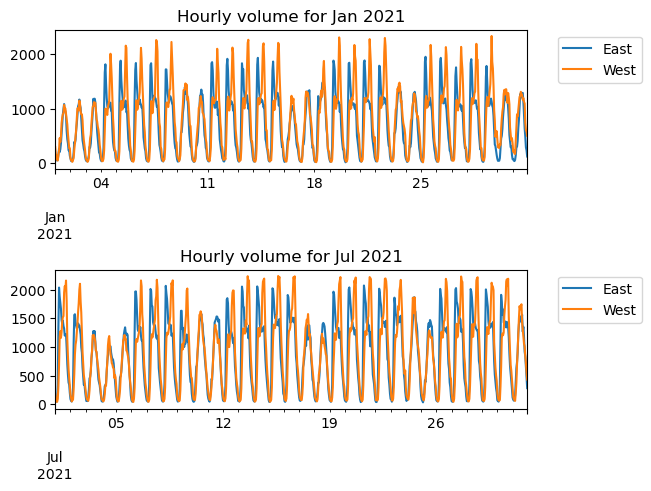

In [149]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)
df_east[df_east.index.month == 1].plot(ax=ax[0])
df_west[df_west.index.month == 1].plot(ax=ax[0])
ax[0].title.set_text('Hourly volume for Jan 2021')
ax[0].legend(['East', "West"], bbox_to_anchor=(1.05, 1), loc=2)
df_east[df_east.index.month == 7].plot(ax=ax[1])
df_west[df_west.index.month == 7].plot(ax=ax[1])
ax[1].legend(['East', "West"], bbox_to_anchor=(1.05, 1), loc=2)
ax[1].title.set_text('Hourly volume for Jul 2021')
plt.show()

Next, we plot the average hourly volume by week. Note the sharp drop off in week 52 due to holidays.

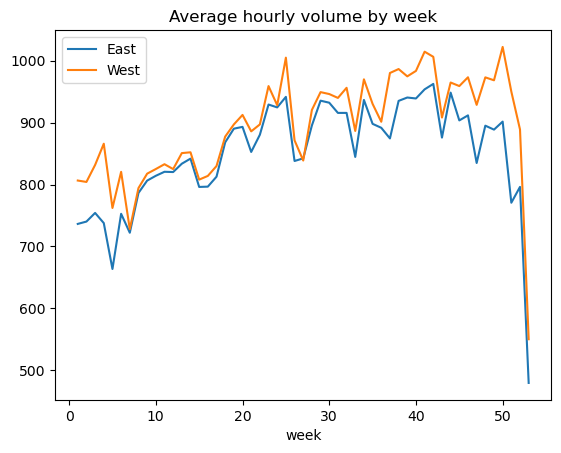

In [154]:
ax = df_east.groupby(by=df_east.index.isocalendar().week).mean().plot()
df_west.groupby(by=df_west.index.isocalendar().week).mean().plot(ax=ax)
plt.legend(['East', 'West'])
plt.title('Average hourly volume by week')
plt.show()

Lastly, we plot the average hourly volume by month.

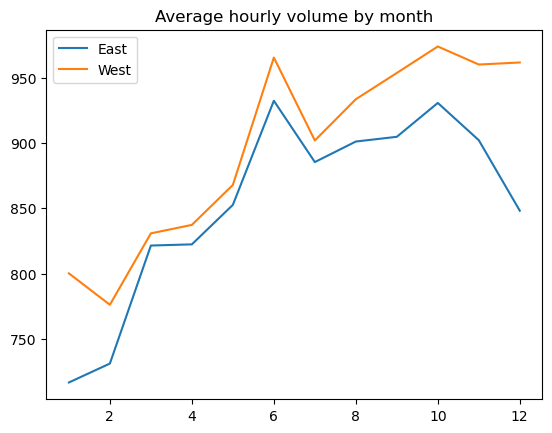

In [155]:
ax = df_east.groupby(by=df_east.index.month).mean().plot()
df_west.groupby(by=df_west.index.month).mean().plot(ax=ax)
plt.legend(['East', 'West'])
plt.title('Average hourly volume by month')
plt.show()

plot pacf, acf to show seasonality. for some acf/pacf graphs: https://developers.refinitiv.com/en/article-catalog/article/ai-data-engineering-eda-for-time-series-data-using-pycaret

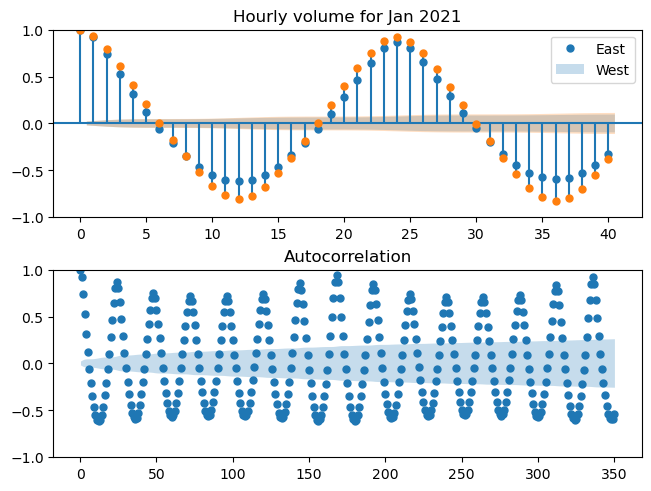

In [180]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)
sm.graphics.tsa.plot_acf(df_east, lags=40, ax=ax[0], use_vlines=False)
sm.graphics.tsa.plot_acf(df_west, lags=40, ax=ax[0])
ax[0].title.set_text('Hourly volume for Jan 2021')
ax[0].legend(['East', "West"])
sm.graphics.tsa.plot_acf(df_east, lags=350, ax=ax[1], use_vlines=False)
sm.graphics.tsa.plot_acf(df_west, lags=350, ax=ax[1], use_vlines=False)
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)
sm.graphics.tsa.plot_acf(df_east, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_east, lags=40, ax=ax[1])
plt.show()